In [219]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [220]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [221]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [222]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [223]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [224]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [225]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nPerfect mobile,Mobile is perfect at this rangeOnly issues wit...,26 January 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood phone,I bought it for my father and I see it that th...,26 January 2024
3,5.0,"5.0 out of 5 stars\nVery nice one, value for m...","Great photos n videos, long battery life with ...",27 January 2024
4,4.0,4.0 out of 5 stars\nGood function,All is fine. Camera is not great. It's too gra...,25 December 2023
...,...,...,...,...
95,5.0,5.0 out of 5 stars\nNice phone,Nice,14 January 2024
96,4.0,4.0 out of 5 stars\nGood phone in low budget d...,"for basic usage Okay, I am not using it, so I ...",28 October 2023
97,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024
98,5.0,5.0 out of 5 stars\nIt is worth it,It is more than what I expected,12 January 2024


In [226]:
df.to_csv("/content/Elon_musk.csv")

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [228]:
# load the dataset
reviews=pd.read_csv('/content/Elon_musk.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nPerfect mobile,Mobile is perfect at this rangeOnly issues wit...,26 January 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood phone,I bought it for my father and I see it that th...,26 January 2024
3,5.0,"5.0 out of 5 stars\nVery nice one, value for m...","Great photos n videos, long battery life with ...",27 January 2024
4,4.0,4.0 out of 5 stars\nGood function,All is fine. Camera is not great. It's too gra...,25 December 2023
...,...,...,...,...
95,5.0,5.0 out of 5 stars\nNice phone,Nice,14 January 2024
96,4.0,4.0 out of 5 stars\nGood phone in low budget d...,"for basic usage Okay, I am not using it, so I ...",28 October 2023
97,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024
98,5.0,5.0 out of 5 stars\nIt is worth it,It is more than what I expected,12 January 2024


In [229]:
reviews.Rating.describe()

count    100.000000
mean       4.290000
std        0.518253
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [230]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Mobile is perfect at this rangeOnly issues wit...,17
1,The media could not be loaded.\n ...,559
2,I bought it for my father and I see it that th...,107
3,"Great photos n videos, long battery life with ...",23
4,All is fine. Camera is not great. It's too gra...,16


In [231]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Mobile is perfect at this rangeOnly issues wit...,95
1,The media could not be loaded.\n ...,2792
2,I bought it for my father and I see it that th...,578
3,"Great photos n videos, long battery life with ...",135
4,All is fine. Camera is not great. It's too gra...,77


In [232]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Mobile is perfect at this rangeOnly issues wit...,4.647059
1,The media could not be loaded.\n ...,4.133581
2,I bought it for my father and I see it that th...,4.411215
3,"Great photos n videos, long battery life with ...",4.913043
4,All is fine. Camera is not great. It's too gra...,3.875000


In [233]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Mobile is perfect at this rangeOnly issues wit...,9
1,The media could not be loaded.\n ...,214
2,I bought it for my father and I see it that th...,44
3,"Great photos n videos, long battery life with ...",5
4,All is fine. Camera is not great. It's too gra...,7


In [234]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Mobile is perfect at this rangeOnly issues wit...,0
1,The media could not be loaded.\n ...,0
2,I bought it for my father and I see it that th...,0
3,"Great photos n videos, long battery life with ...",0
4,All is fine. Camera is not great. It's too gra...,0


In [235]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Mobile is perfect at this rangeOnly issues wit...,0
1,The media could not be loaded.\n ...,20
2,I bought it for my father and I see it that th...,1
3,"Great photos n videos, long battery life with ...",0
4,All is fine. Camera is not great. It's too gra...,0


In [236]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Mobile is perfect at this rangeOnly issues wit...,0
1,The media could not be loaded.\n ...,8
2,I bought it for my father and I see it that th...,6
3,"Great photos n videos, long battery life with ...",0
4,All is fine. Camera is not great. It's too gra...,1


In [237]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Mobile is perfect at this rangeOnly issues wit...
1    The media could not be loaded.\n              ...
2    I bought it for my father and I see it that th...
3    Great photo n video, long battery life with fa...
4    All is fine. Camera is not great. It's too gra...
Name: Review, dtype: object

In [238]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     26
1     26
2     26
3     27
4     25
      ..
95    14
96    28
97    14
98    12
99    27
Name: Review_Date, Length: 100, dtype: object 
 0      January
1     February
2      January
3      January
4     December
        ...   
95     January
96     October
97     January
98     January
99    February
Name: Review_Date, Length: 100, dtype: object 
 0     2024
1     2022
2     2024
3     2024
4     2023
      ... 
95    2024
96    2023
97    2024
98    2024
99    2022
Name: Review_Date, Length: 100, dtype: object


In [239]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,26,January,2024
1,26,February,2022
2,26,January,2024
3,27,January,2024
4,25,December,2023
...,...,...,...
95,14,January,2024
96,28,October,2023
97,14,January,2024
98,12,January,2024


In [240]:
df.Month.value_counts()

January     64
December    21
February     6
November     6
October      3
Name: Month, dtype: int64

In [241]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,January
1,2
2,January
3,January
4,December
...,...
95,January
96,October
97,January
98,January


In [242]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   word_count   100 non-null    int64  
 5   char_count   100 non-null    int64  
 6   avg_word     100 non-null    float64
 7   stopwords    100 non-null    int64  
 8   hashtags     100 non-null    int64  
 9   numerics     100 non-null    int64  
 10  upper        100 non-null    int64  
 11  Date         100 non-null    object 
 12  Month        100 non-null    object 
 13  Year         100 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 11.1+ KB


In [243]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       100 non-null    object 
 3   Review_Date  100 non-null    object 
 4   word_count   100 non-null    int64  
 5   char_count   100 non-null    int64  
 6   avg_word     100 non-null    float64
 7   stopwords    100 non-null    int64  
 8   hashtags     100 non-null    int64  
 9   numerics     100 non-null    int64  
 10  upper        100 non-null    int64  
 11  Date         100 non-null    int64  
 12  Month        100 non-null    object 
 13  Year         100 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 11.1+ KB


In [244]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,5.0,5.0 out of 5 stars\nPerfect mobile,Mobile is perfect at this rangeOnly issues wit...,17,95,4.647059,9,0,0,0,26,January,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,559,2792,4.133581,214,0,20,8,26,2,2022
2,5.0,5.0 out of 5 stars\nGood phone,I bought it for my father and I see it that th...,107,578,4.411215,44,0,1,6,26,January,2024
3,5.0,"5.0 out of 5 stars\nVery nice one, value for m...","Great photos n videos, long battery life with ...",23,135,4.913043,5,0,0,0,27,January,2024
4,4.0,4.0 out of 5 stars\nGood function,All is fine. Camera is not great. It's too gra...,16,77,3.875000,7,0,0,1,25,December,2023


In [245]:
df

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,5.0,5.0 out of 5 stars\nPerfect mobile,Mobile is perfect at this rangeOnly issues wit...,26 January 2024,17,95,4.647059,9,0,0,0,26,January,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,559,2792,4.133581,214,0,20,8,26,February,2022
2,5.0,5.0 out of 5 stars\nGood phone,I bought it for my father and I see it that th...,26 January 2024,107,578,4.411215,44,0,1,6,26,January,2024
3,5.0,"5.0 out of 5 stars\nVery nice one, value for m...","Great photos n videos, long battery life with ...",27 January 2024,23,135,4.913043,5,0,0,0,27,January,2024
4,4.0,4.0 out of 5 stars\nGood function,All is fine. Camera is not great. It's too gra...,25 December 2023,16,77,3.875000,7,0,0,1,25,December,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.0,5.0 out of 5 stars\nNice phone,Nice,14 January 2024,1,4,4.000000,0,0,0,0,14,January,2024
96,4.0,4.0 out of 5 stars\nGood phone in low budget d...,"for basic usage Okay, I am not using it, so I ...",28 October 2023,35,169,3.857143,13,0,0,2,28,October,2023
97,5.0,5.0 out of 5 stars\nGood phone,Best in class phone,14 January 2024,4,19,4.000000,1,0,0,0,14,January,2024
98,5.0,5.0 out of 5 stars\nIt is worth it,It is more than what I expected,12 January 2024,7,31,3.571429,4,0,0,1,12,January,2024


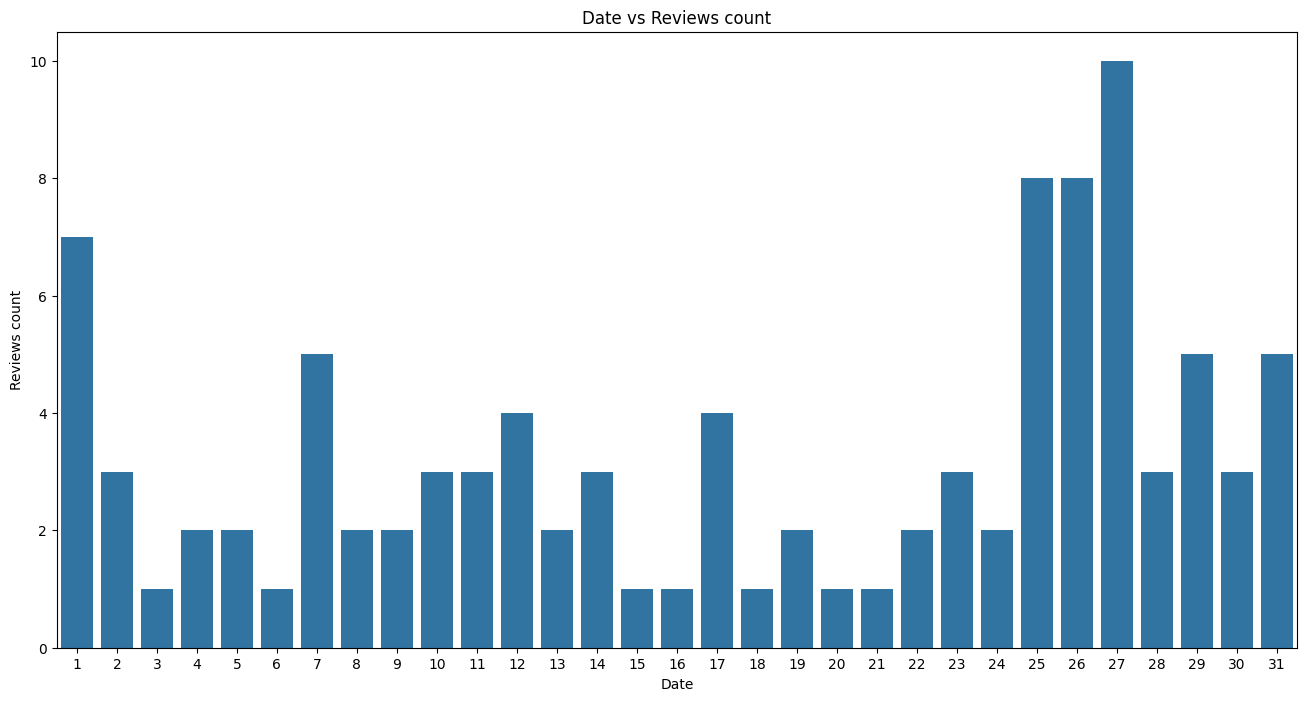

In [246]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

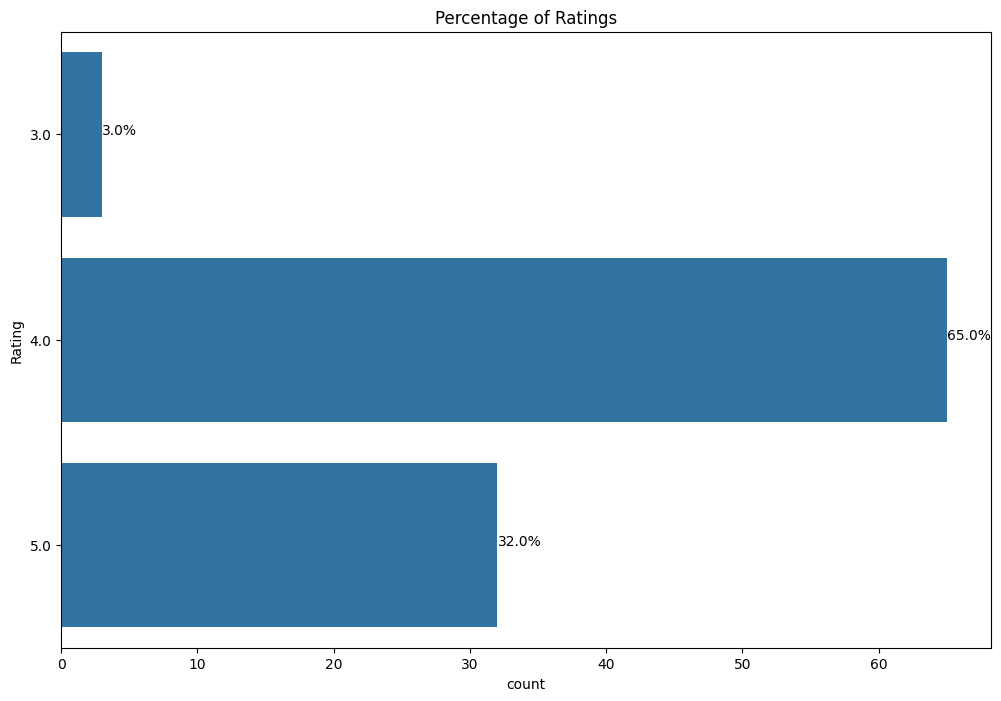

In [247]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [248]:
data = df[['Review']]
data

,Review
0,Mobile is perfect at this rangeOnly issues wit...
1,The media could not be loaded.\n ...
2,I bought it for my father and I see it that th...
3,"Great photos n videos, long battery life with ..."
4,All is fine. Camera is not great. It's too gra...
...,...
95,Nice
96,"for basic usage Okay, I am not using it, so I ..."
97,Best in class phone
98,It is more than what I expected


In [249]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [250]:
data

,Review
0,mobile perfect rangeonly issues batteryit work...
1,the media could loaded. build quality - rating...
2,i bought father i see decent phone per father ...
3,"great photos n videos, long battery life fast ..."
4,all fine. camera great. it's grainy. i donno bad.
...,...
95,nice
96,"basic usage okay, i using it, i know much. tha..."
97,best class phone
98,it i expected


In [251]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [252]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...


In [253]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [254]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [255]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [256]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [257]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [258]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [259]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [260]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [261]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [262]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...
9,nice working slow,Nice but working slow


In [263]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...,"[mobile, perfect, rangeonly, issue, batteryit,..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...,"[bought, father, see, decent, phone, per, fath..."
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ...","[great, photo, n, video, long, battery, life, ..."
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...,"[fine, camera, great, grainy, donno, bad]"
5,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,"[performance, awesome, product, quality, excee..."
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ...","[oneplus, nord, ce, g, bahamas, blue, gb, ram,..."
7,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...,"[recently, purchased, oneplus, nord, ce, lite,..."
8,best budget g phone bought still running flawl...,Best budget 5g phone I had bought it in 2023.S...,"[best, budget, g, phone, bought, still, runnin..."
9,nice working slow,Nice but working slow,"[nice, working, slow]"


In [264]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [265]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [266]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [mobile, perfect, rangeonly, issue, batteryit,...
1    [medium, could, loaded, build, quality, rating...
2    [bought, father, see, decent, phone, per, fath...
3    [great, photo, n, video, long, battery, life, ...
4            [fine, camera, great, grainy, donno, bad]
5    [performance, awesome, product, quality, excee...
6    [oneplus, nord, ce, g, bahamas, blue, gb, ram,...
7    [recently, purchased, oneplus, nord, ce, lite,...
8    [best, budget, g, phone, bought, still, runnin...
9                                [nice, working, slow]
Name: Clean_Reviews, dtype: object

In [267]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [268]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,mobil perfect rangeon issu batteryit work dayr...
1,medium could load build qualiti rate one light...
2,bought father see decent phone per father pov ...
3,great photo n video long batteri life fast cha...
4,fine camera great graini donno bad
...,...
94,nice
95,basic usag okay use know much plastic back cov...
96,best class phone
97,expect


In [269]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,mobile perfect rangeonly issue batteryit work ...
1,medium could loaded build quality rating one l...
2,bought father see decent phone per father pov ...
3,great photo n video long battery life fast cha...
4,fine camera great grainy donno bad
...,...
94,nice
95,basic usage okay using know much plastic back ...
96,best class phone
97,expected


In [270]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [271]:
#print(cv.vocabulary_)

In [272]:
print(tweetscv.toarray()[100:200])

[]


In [273]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [274]:
corpus[3]

'great photo n video long batteri life fast charg android updat avail lot hidden featur littl heavi'

In [275]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [276]:
X.shape

(99, 3360)

In [277]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [278]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [279]:
corpus[4]

'fine camera great graini donno bad'

In [280]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [281]:
X.shape

(99, 3360)

In [282]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [283]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'mobile perfect rangeonly issue batteryit work dayrest good medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone liked recommend gray one attache fingerprint going use back cover matterdisplay rating really good amoled plan hz refresh rate work well wish could hz bottom chin quite thick thing yes gorilla glass protection screen guard pre applied panel one best pretty decent wellperformance rating dimensity ufs lppdr x ram get job done regular day day operation played game say considering soc pretty good expect fps stable bgmi cod still would say processor good competition offering better decide gaming matter next year last easily normal usagesoftware biggest con android based oxygen o say future color oos overall quite stable bug still say lot wait android better ideacamera rating mp decent atleast expecting samsung sensor though provided omniv

In [284]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [285]:
for token in doc_block[:50]:
    print(token,token.pos_)

mobile NOUN
perfect ADJ
rangeonly ADJ
issue NOUN
batteryit ADJ
work NOUN
dayrest ADJ
good ADJ
medium NOUN
could AUX
loaded VERB
build VERB
quality NOUN
rating NOUN
one NUM
light ADJ
weight NOUN
phone NOUN
say VERB
quite ADV
comfortable ADJ
one NUM
hand NOUN
usage NOUN
even ADV
material NOUN
used VERB
polycarbonate NOUN
get NOUN
job NOUN
done VERB
matter NOUN
back ADV
cover NOUN
term NOUN
styling VERB
similar ADJ
oppo NOUN
phone NOUN
liked VERB
recommend VERB
gray ADJ
one NUM
attache NOUN
fingerprint PROPN
going VERB
use NOUN
back ADV
cover NOUN
matterdisplay NOUN


In [286]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'minute', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'quality', 'rating', 'none', 'party', 'complained', 'voice', 'getting', 'conclude', 'buy', 'care', 'oneplus', 'want', 'try', 'oneplus', 'time', 'getting', 'price', 'rejected', 'miui', 'user', 'want', 'software', 'ad', 'notification', 'bloatwares', 'bought', 'see', 'phone', 'father', 'recommende', 'battery', 'life', 'give', 'day', 'backup', 'point', 'noted', 'bought', 'writing', 'review', 'pov', 'charging', 'come', 'charger', 'charge', 'phone', 'h', 'mand', 'software', 'experience', 'using', 'compare', 'saw', 'oxygen', 'o', 'stock', 'android', 'experience', 'phone', 'gamer', 'user', 'photo', 'video', 'battery', 'life', 'charging', 'update', 'lot']


In [287]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,56
1,camera,25
2,quality,18
3,battery,17
4,feature,13
5,product,13
6,day,12
7,oneplus,12
8,buy,12
9,performance,12


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

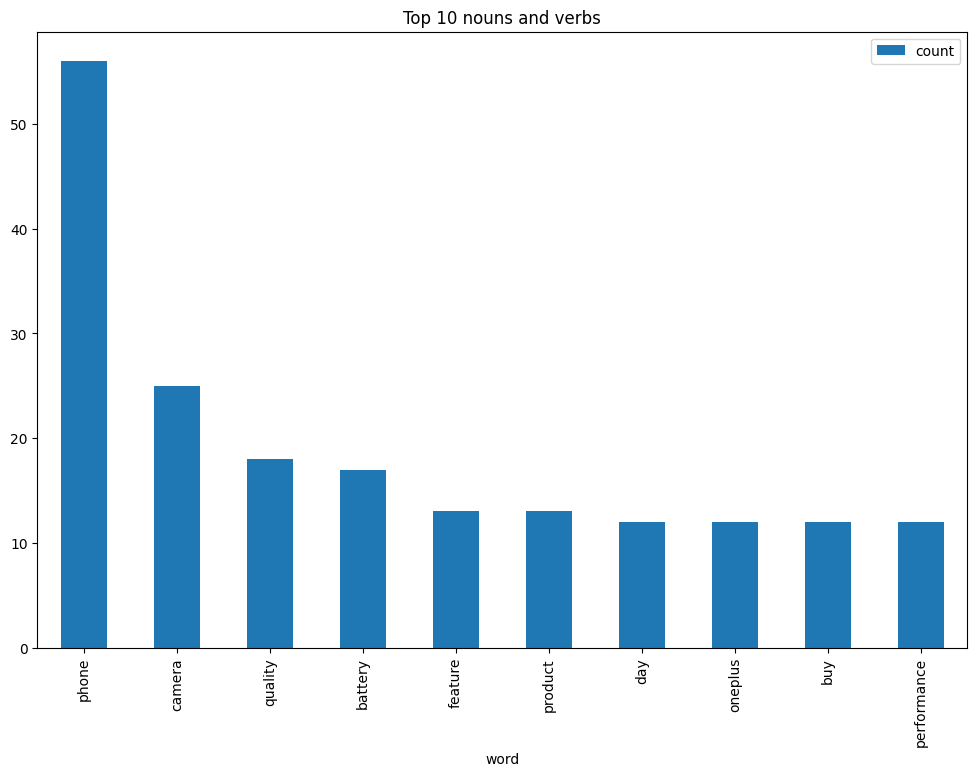

In [288]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [289]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [290]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [291]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,98
neg,1


In [292]:
dataframe.Clean_Reviews[8]

'best budget g phone bought still running flawlessly'

In [293]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.7184}

In [294]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,mobile perfect rangeonly issue batteryit work ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,bought father see decent phone per father pov ...,"{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compou..."
3,great photo n video long battery life fast cha...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp..."
4,fine camera great grainy donno bad,"{'neg': 0.282, 'neu': 0.242, 'pos': 0.476, 'co..."


In [295]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,mobile perfect rangeonly issue batteryit work ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.7650
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977
2,bought father see decent phone per father pov ...,"{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compou...",0.9623
3,great photo n video long battery life fast cha...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.6249
4,fine camera great grainy donno bad,"{'neg': 0.282, 'neu': 0.242, 'pos': 0.476, 'co...",0.3400


In [296]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,mobile perfect rangeonly issue batteryit work ...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.7650,Positive
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977,Positive
2,bought father see decent phone per father pov ...,"{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compou...",0.9623,Positive
3,great photo n video long battery life fast cha...,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.6249,Positive
4,fine camera great grainy donno bad,"{'neg': 0.282, 'neu': 0.242, 'pos': 0.476, 'co...",0.3400,Positive
...,...,...,...,...
94,nice,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,Positive
95,basic usage okay using know much plastic back ...,"{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...",0.9081,Positive
96,best class phone,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,Positive
97,expected,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

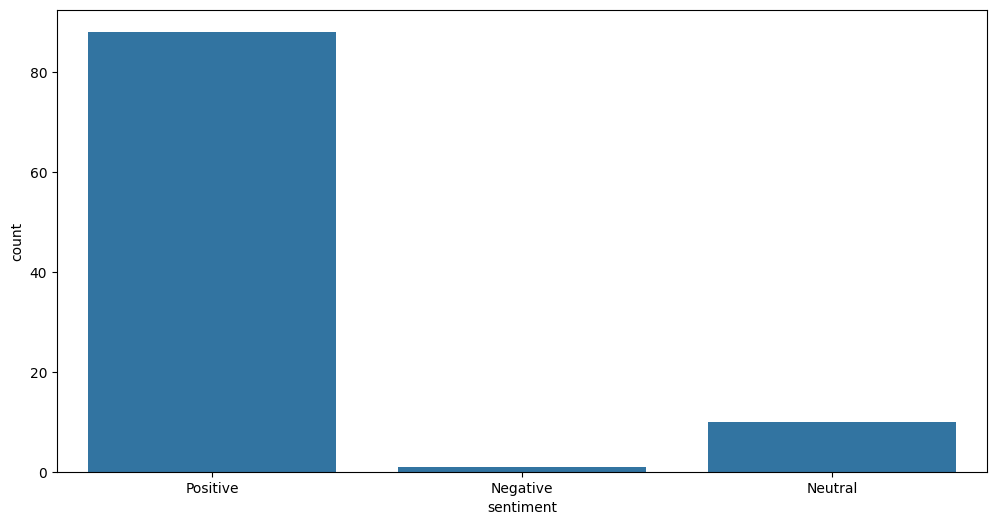

In [297]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<Axes: xlabel='compound', ylabel='Density'>

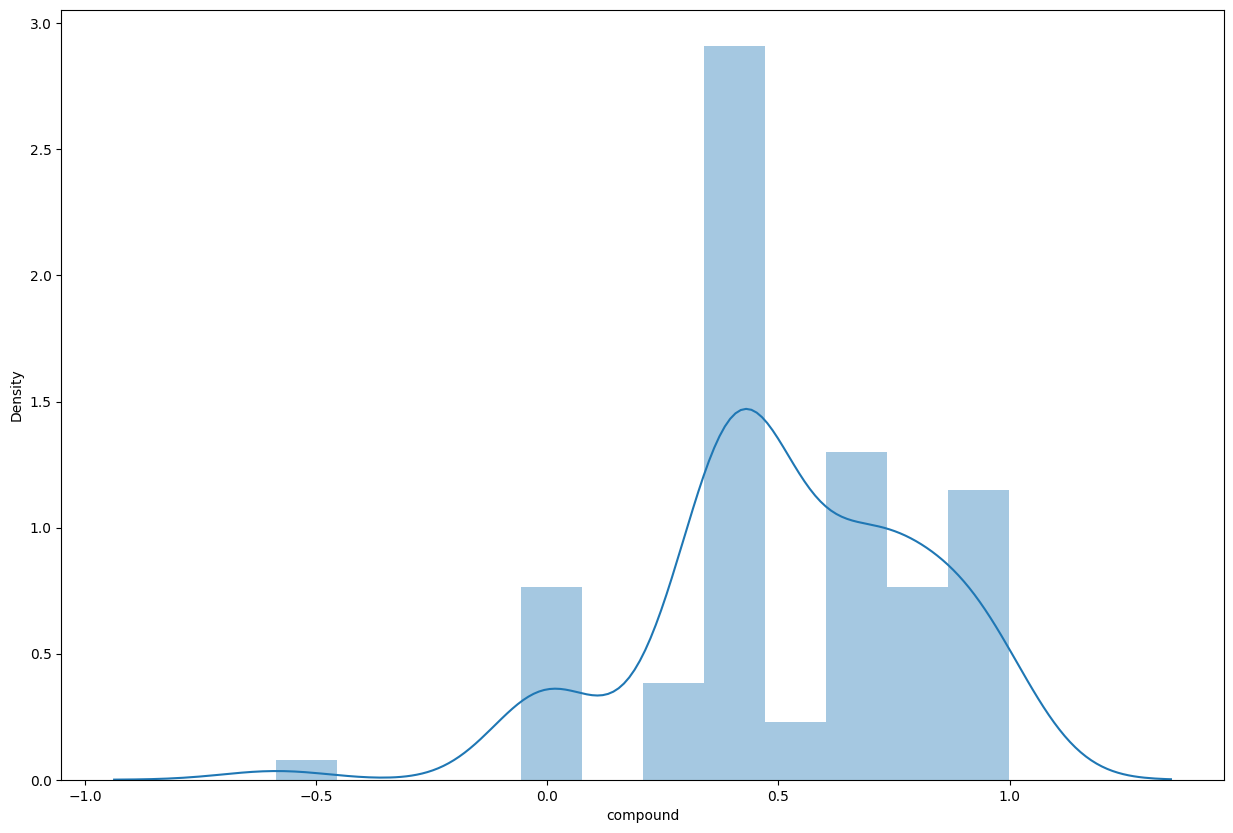

In [298]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [299]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,95
neg,4


In [300]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,mobile perfect rangeonly issue batteryit work ...,Mobile is perfect at this rangeOnly issues wit...,0.800000,0.850000
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783
2,bought father see decent phone per father pov ...,I bought it for my father and I see it that th...,0.504167,0.422222
3,great photo n video long battery life fast cha...,"Great photos n videos, long battery life with ...",0.497619,0.113690
4,fine camera great grainy donno bad,All is fine. Camera is not great. It's too gra...,0.638889,0.172222


Text(0, 0.5, 'Subjectivity')

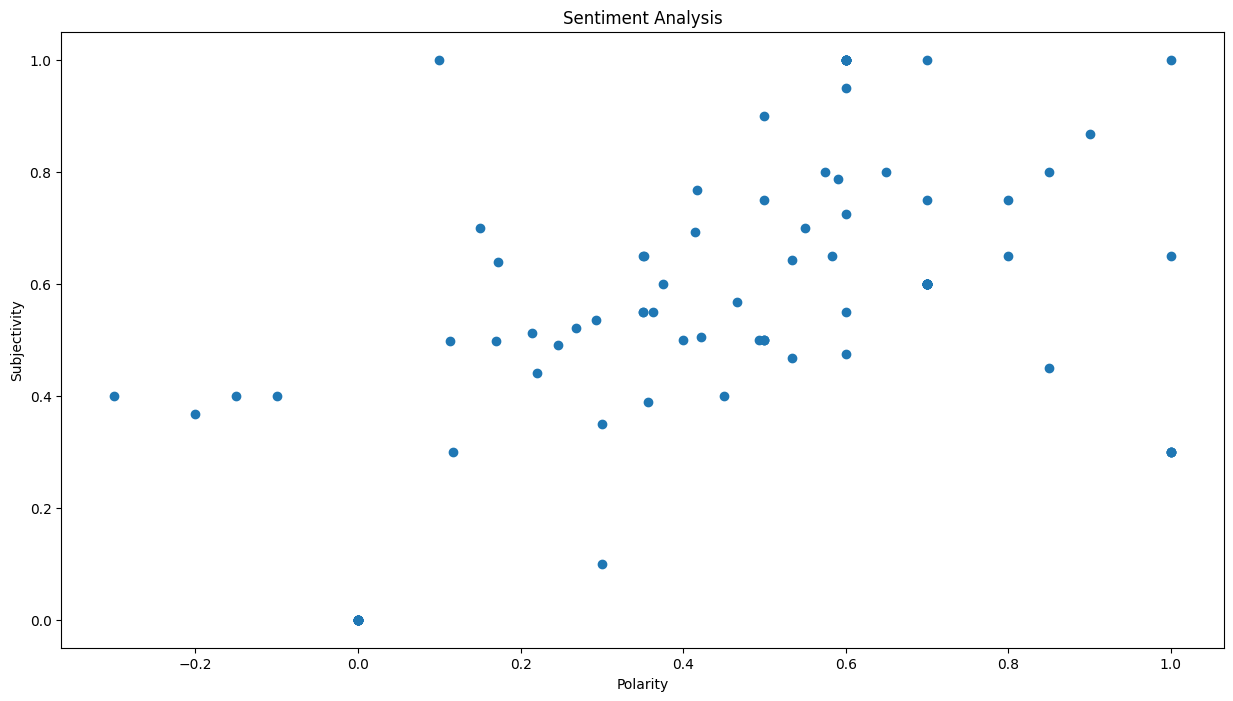

In [301]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [302]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()